In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.naive_bayes import GaussianNB

In [2]:
data=pd.read_csv('Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [3]:
data.shape

(891, 12)

we have 891 rows and 12 columns in the dataset

In [4]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We have 4 variables if int type 2 variables of float type and 5 variables of object type

In [6]:
duplicate = data.duplicated()
print(duplicate.sum())
data[duplicate]

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


 There are no duplicate data in our dataset

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have 177 missing values in Age variable, 687 missing values in Cabin variable and 2 missing values in Embarked varaiable

# Removing/Replacing Null Values

In [8]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [9]:
data=data.drop(['Name','Cabin','Ticket'],axis=1)    #irrelevant features

In [10]:
m=data['Embarked'].mode()
data['Embarked'].fillna(m[0],inplace=True)

# Confirming Removal of Null Values

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [12]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

We have :
    646 values of type S,
    168 values of type C,
    77 values of type Q
    in Embarked variable

In [13]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,646
mean,446.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,13.002015,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


     From above we can see the Mean/ Standard Deviation and other information for all the attributes
     We can see that Fare variable max value is way greater than 75% value

**Survival acc to gender**

In [14]:
# plot of  male and female who survived

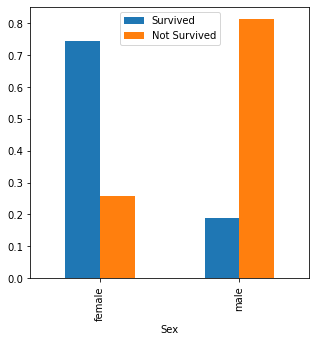

In [15]:
data['Not Survived']=1-data['Survived']
data.groupby('Sex').agg('mean')[['Survived', 'Not Survived']].plot(kind='bar', figsize=(5, 5));                            

We can observe that the number of female survived is way greater than number of male survived

In [16]:
print(pd.crosstab(data['Survived'],data['Sex']))

Sex       female  male
Survived              
0             81   468
1            233   109


Proportion of survived by Gender

In [17]:
print(data.groupby('Sex').Survived.mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


 We can see female survive more than male

**Survival acc to Class**

In [18]:
print(pd.crosstab(data['Survived'],data['Pclass']))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Proportion of survived by class

In [19]:
print(data.groupby('Pclass').Survived.mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


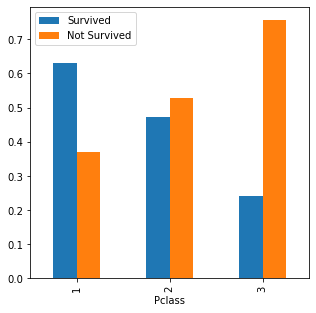

In [20]:
data['Not Survived']=1-data['Survived']
data.groupby('Pclass').agg('mean')[['Survived', 'Not Survived']].plot(kind='bar', figsize=(5, 5));                            

 We can observe class 1 have more chances of survival as compared to rest of the classes

**Survival acc to embarked**

In [21]:
print(pd.crosstab(data['Survived'],data['Embarked']))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


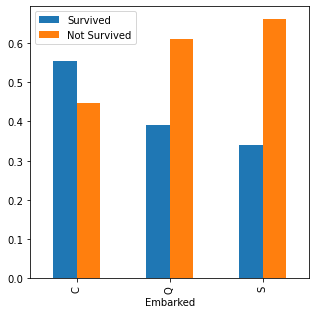

In [22]:
data['Not Survived']=1-data['Survived']
data.groupby('Embarked').agg('mean')[['Survived', 'Not Survived']].plot(kind='bar', figsize=(5, 5));                            

     Embarked 'C'  have more changes of survival then rest of the categories
     Embarked 'S' have more chances to not survive 

**Survival acc to parch**

In [23]:
print(pd.crosstab(data['Survived'],data['Parch']))

Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0


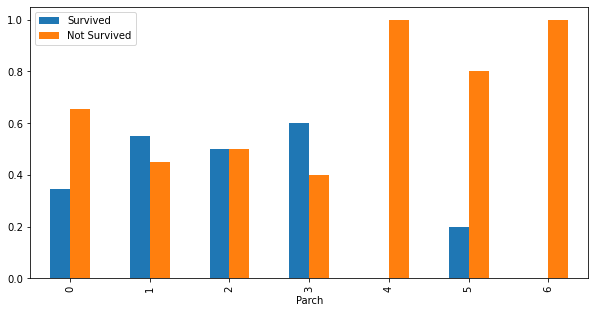

In [24]:
data['Not Survived']=1-data['Survived']
data.groupby('Parch').agg('mean')[['Survived', 'Not Survived']].plot(kind='bar', figsize=(10, 5));                            

    we can observe survival of 3 is higher than the others
    we can onserver that in parch 6 and 4 it is 100% non-survival rate

**Survival acc to sibsp**

In [25]:
print(pd.crosstab(data['Survived'],data['SibSp']))

SibSp       0    1   2   3   4  5  8
Survived                            
0         398   97  15  12  15  5  7
1         210  112  13   4   3  0  0


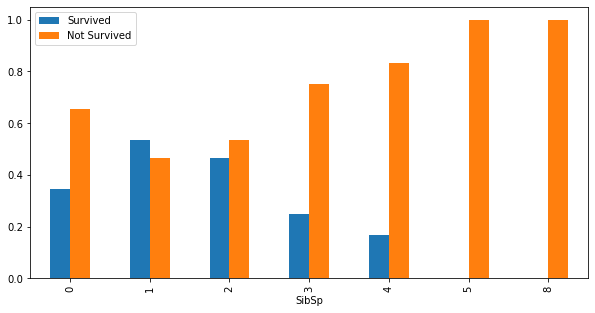

In [26]:
data['Not Survived']=1-data['Survived']
data.groupby('SibSp').agg('mean')[['Survived', 'Not Survived']].plot(kind='bar', figsize=(10,5));                            

    We can observer that in SibSp 5 & 8 their is 0% survival rate

**Survival acc to Age**

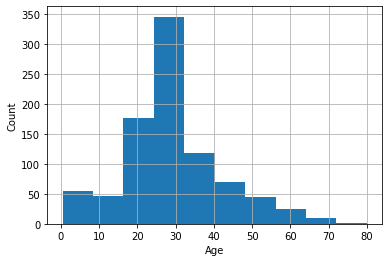

In [27]:
data.Age.hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Age'>

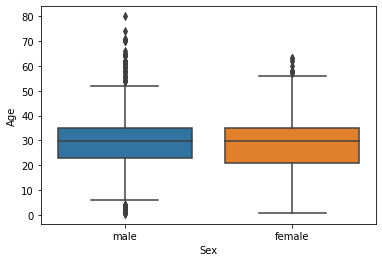

In [28]:
#Checking for outliers in Age data
sns.boxplot(x='Sex',y='Age',data=data)

We can conclude that outliers are present in age variable

# Removing Outliers

In [29]:
IQR = data['Age'].quantile(0.75)-data['Age'].quantile(0.25)
Barmax =  data['Age'].quantile(0.75) + 1.5*IQR
Barmin =  data['Age'].quantile(0.25) - 1.5*IQR
data.loc[data['Age']>Barmax,'Age'] = Barmax
data.loc[data['Age']<Barmin,'Age'] = Barmin

# converting the categorical to labels

In [30]:
encoder= LabelEncoder()
data['Sex']=encoder.fit_transform(data['Sex'])
data['Embarked']=encoder.fit_transform(data['Embarked'])                         
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Not Survived
0,1,0,3,1,22.0,1,0,7.2500,2,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,2,0
3,4,1,1,0,35.0,1,0,53.1000,2,0
4,5,0,3,1,35.0,0,0,8.0500,2,1


# Train Test Split


In [31]:
# seperating the dependent and independent variables
x=data.drop(['Survived'],axis=1)
y=data['Survived']

In [32]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

Best Accuracy is 1.0 on Random State 0


In [33]:
#splitting our train and test data
train_x,test_x,train_y,test_y= train_test_split(x, y, test_size=0.2,random_state=0)

# Model building & Cross Validation

------------Logistic Regression------------

In [34]:
reg= LogisticRegression()
reg.fit(train_x,train_y)
y_pred = reg.predict(test_x)
s = accuracy_score(y_pred, test_y) 
print('Acc Score',s)

Acc Score 1.0


In [35]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [36]:
#K-fold cross validation for logistic Regression
cv_scores = cross_val_score(reg,x,y,cv=5) 
np.mean(cv_scores)

1.0

    Cross Validation Score is 0.99

------------Decision tree------------

In [37]:
cl=DecisionTreeClassifier(random_state=10)
cl.fit(train_x,train_y)
y_predict=cl.predict(test_x)

In [38]:
print(classification_report(test_y,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [39]:
#K-fold cross validation 
cv_scores1 = cross_val_score(cl,x,y,cv=5) 
np.mean(cv_scores1)

1.0

    Cross validation score is 1.0


------------------------ Random Forest------------

In [40]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(train_x, train_y)
predict_y = rf.predict(test_x)
print(classification_report(test_y,predict_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [41]:
#K-fold cross validation 
cv_scores1 = cross_val_score(rf,x,y,cv=5) 
np.mean(cv_scores1)

1.0

    Cross validation score is 1.0

------------Naive Bayes------------

In [42]:
g = GaussianNB()
g.fit(train_x,train_y)  
G_pred = g.predict(test_x)
acc = classification_report(test_y,G_pred)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [43]:
#K-fold cross validation 
cv_scores2 = cross_val_score(g,x,y,cv=5) 
np.mean(cv_scores2)

1.0

    Cross validation score is 1.0

------------SVM------------

In [44]:
SV = SVC(probability=True)
SV.fit(train_x,train_y)
SVpred = SV.predict(test_x)
acc = classification_report(test_y,SVpred)
print(acc)

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       110
           1       0.90      0.13      0.23        69

    accuracy                           0.66       179
   macro avg       0.77      0.56      0.50       179
weighted avg       0.74      0.66      0.57       179



In [45]:
#K-fold cross validation 
cv_scores3 = cross_val_score(SV,x,y,cv=5) 
np.mean(cv_scores3)

0.6386353650116126

Cross validation score is 0.63

Calculating best model  

    Logistic Regression = |1.00  - 0.99| = 0.01   
    Decision Tree = |1.00 - 1.00| = 0.00   
    Random Forest = |1.00 - 1.00| = 0.00   
    Naive Bayes = |1.00 - 1.00| = 0.00   
    SVM = |0.66 - 0.63| = 0.03  

Best fit model is Decision tree,Random Forest Model and naive bayes

# Hypertuning Random forest

In [46]:
from sklearn.model_selection import GridSearchCV
parameter = {
   'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [47]:
GCV.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4]})

In [48]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1}

# Building Final Model

In [49]:
Final_model = RandomForestClassifier(bootstrap=True,max_depth=10,max_features='auto',min_samples_leaf=1)
Final_model.fit(train_x,train_y)
pred = Final_model.predict(test_x)
acc = accuracy_score(test_y,pred)
print(acc*100)

100.0


# ROC curve

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

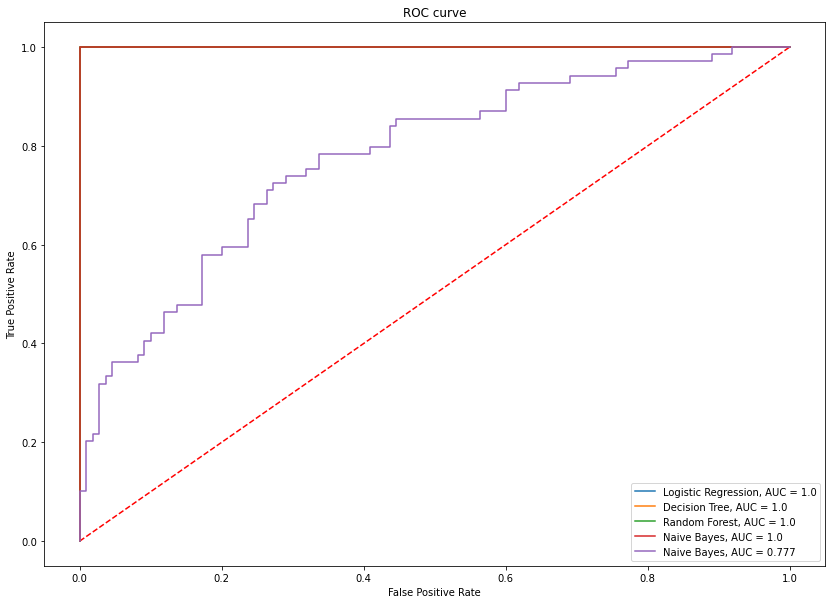

In [51]:

fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')
#KNN

#Logistic Regression
preds_proba_lg = reg.predict_proba(test_x)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(test_y, probslg)
auclg = roc_auc_score(test_y, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#Decision Tree Classifier
preds_proba_DTC = cl.predict_proba(test_x)
probsDTC = preds_proba_DTC[:, 1]
fpr, tpr, thresh = roc_curve(test_y, probsDTC)
aucDTC = roc_auc_score(test_y, probsDTC)
plt.plot(fpr, tpr, label=f'Decision Tree, AUC = {str(round(aucDTC,3))}')

#Random Forest
preds_proba_RFC = Final_model.predict_proba(test_x)
probsRFC = preds_proba_RFC[:, 1]
fpr, tpr, thresh = roc_curve(test_y, probsRFC)
aucRFC = roc_auc_score(test_y, probsRFC)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(aucRFC,3))}')

#Naive Bayes
preds_proba_gnb = g.predict_proba(test_x)
probsgnb = preds_proba_gnb[:, 1]
fpr, tpr, thresh = roc_curve(test_y, probsgnb)
aucgnb = roc_auc_score(test_y, probsgnb)
plt.plot(fpr, tpr, label=f'Naive Bayes, AUC = {str(round(aucgnb,3))}')

#SVM
preds_proba_SV = SV.predict_proba(test_x)
probSV = preds_proba_SV[:, 1]
fpr, tpr, thresh = roc_curve(test_y, probSV)
aucSV = roc_auc_score(test_y, probSV)
plt.plot(fpr, tpr, label=f'Naive Bayes, AUC = {str(round(aucSV,3))}')

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

    We can observer our final model is performing good

# Saving the model

In [52]:
import joblib
joblib.dump(Final_model,"Titanic.pkl")


['Titanic.pkl']